In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for Train (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values (0-255 → 0-1)
    rotation_range=20,    # Random rotation
    width_shift_range=0.2, # Horizontal shift
    height_shift_range=0.2, # Vertical shift
    shear_range=0.2,      # Shear transformation
    zoom_range=0.2,       # Zoom in/out
    horizontal_flip=True, # Flip images horizontally
    fill_mode='nearest'   # Fill missing pixels
)

# ImageDataGenerator for Validation & Test (No Augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)



# Create Generators
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\LENOVO\Downloads\archive (2)\Lung Disease Dataset\train",
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,
    class_mode='categorical' # Use 'binary' for 2 classes, 'categorical' for >2
)

val_generator = val_test_datagen.flow_from_directory(
   r"C:\Users\LENOVO\Downloads\archive (2)\Lung Disease Dataset\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    r"C:\Users\LENOVO\Downloads\archive (2)\Lung Disease Dataset\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No shuffling for test set
)


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


In [ ]:
"C:\Users\LENOVO\Downloads\archive (2)\Lung Disease Dataset\test\Bacterial Pneumonia\person125_bacteria_594.jpeg"

Class Labels with Their Index:
Class Index: 0, Class Name: Bacterial Pneumonia
Class Index: 1, Class Name: Corona Virus Disease
Class Index: 2, Class Name: Normal
Class Index: 3, Class Name: Tuberculosis
Class Index: 4, Class Name: Viral Pneumonia

Class Distribution in Test Set:
Bacterial Pneumonia: 403 images
Corona Virus Disease: 407 images
Normal: 404 images
Tuberculosis: 408 images
Viral Pneumonia: 403 images

Sample of true labels:
Image 1: Class Index = 0, Class Name = Bacterial Pneumonia
Image 2: Class Index = 0, Class Name = Bacterial Pneumonia
Image 3: Class Index = 0, Class Name = Bacterial Pneumonia
Image 4: Class Index = 0, Class Name = Bacterial Pneumonia
Image 5: Class Index = 0, Class Name = Bacterial Pneumonia
Image 6: Class Index = 0, Class Name = Bacterial Pneumonia
Image 7: Class Index = 0, Class Name = Bacterial Pneumonia
Image 8: Class Index = 0, Class Name = Bacterial Pneumonia
Image 9: Class Index = 0, Class Name = Bacterial Pneumonia
Image 10: Class Index = 0, 

In [29]:
# Load trained CNN model with dropout layers
model = tf.keras.models.load_model(r"C:\Users\LENOVO\Downloads\vggft.h5", compile=False)

# Modify model for Monte Carlo Dropout
f_model = Model(inputs=model.input, outputs=model.output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,879,557 (56.76 MB)

 Trainable params: 14,879,557 (56.76 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


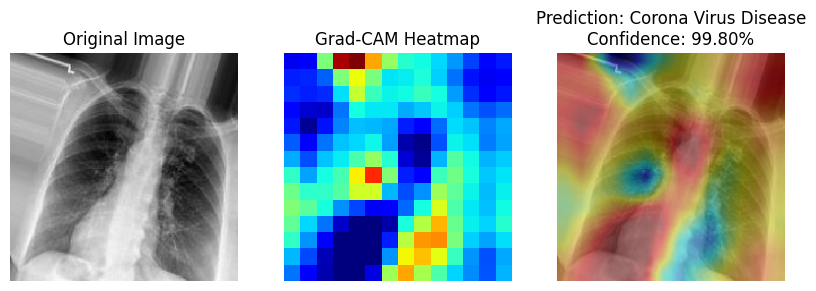

In [37]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def preprocess_image(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array, img

# Function to generate Grad-CAM heatmap
def generate_gradcam(model, img_array, class_index, last_conv_layer_name):
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = np.mean(conv_outputs * pooled_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Function to overlay heatmap on original image
def overlay_heatmap(heatmap, original_img, alpha=0.5):
    heatmap = cv2.resize(heatmap, (original_img.size[0], original_img.size[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlayed_img = cv2.addWeighted(np.array(original_img), alpha, heatmap, 0.4, 0)
    return overlayed_img

# Function to predict and visualize Grad-CAM
def predict_with_gradcam(model, img_path, last_conv_layer_name, class_names):
    img_array, original_img = preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(img_array)[0]
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]
    confidence = predictions[predicted_class_index] * 100

    # Generate Grad-CAM heatmap
    heatmap = generate_gradcam(model, img_array, predicted_class_index, last_conv_layer_name)
    overlayed_img = overlay_heatmap(heatmap, original_img)

    # Display results
    plt.figure(figsize=(10, 4))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis("off")

    # Grad-CAM heatmap
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap="jet")
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    # Overlayed Image
    plt.subplot(1, 3, 3)
    plt.imshow(overlayed_img)
    plt.title(f"Prediction: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.axis("off")

    plt.show()

# Define class names from dataset
class_names = list(test_generator.class_indices.keys())

# Provide image path and last convolutional layer name
image_path =r"C:\Users\LENOVO\Downloads\archive (2)\Lung Disease Dataset\test\Corona Virus Disease\test_0_903.jpeg"
last_conv_layer_name = "block5_conv3"  # Change this based on your model architecture

# Run Grad-CAM visualization with prediction
predict_with_gradcam(model, image_path, last_conv_layer_name, class_names)
